In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import my_data_pipelines as mdp

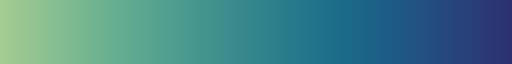

In [195]:
sns.set(rc={"figure.figsize":(25, 12)})
sns.set_context("poster")
palette = "crest"
sns.set_palette(palette=palette)
my_colors = ["#1e90ff", "#1D2562"]
sns.color_palette(palette=palette, as_cmap=True)

In [196]:
df = pd.read_csv("data/param_sweep.csv", sep=';')
df

,T,a,b,delta,s0,travelTimes
0,0.500,0.73,1.67,4,1.0,"12.8601,14.4801,10.8401,10.9602,7.20016,7.6601..."
1,0.725,0.73,1.67,4,1.0,"11.2801,7.82008,17.8202,14.2602,9.12048"
2,0.950,0.73,1.67,4,1.0,"3.46,18.0203,14.4603,10.9403,7.34034,3.64035,3..."
3,1.175,0.73,1.67,4,1.0,"11.2801,7.80008,4.08009,2.98015,0"
4,1.400,0.73,1.67,4,1.0,"3.88,4.56001,13.5003,9.94031,3.06996e-41"
...,...,...,...,...,...,...
94,1.600,0.73,1.67,4,25.0,"9.26002,9.26011,9.2602,7.04025,3.82026,4.56037..."
95,1.600,0.73,1.67,4,28.2,"4.56,9.02011,5.86013,2.98015,3.46025,5.58039,0"
96,1.600,0.73,1.67,4,31.6,"4.56,3.87999,9.2602,14.0804,0"
97,1.600,0.73,1.67,4,35.2,"2.98,9.26011,6.26014,5.58021,5.6403,2.70451e-43"


In [197]:
df['travelTimes'] = df['travelTimes'].apply(lambda r: r.split(','))

In [198]:
df.head()

,T,a,b,delta,s0,travelTimes
0,0.500,0.73,1.67,4,1.0,"[12.8601, 14.4801, 10.8401, 10.9602, 7.20016, ..."
1,0.725,0.73,1.67,4,1.0,"[11.2801, 7.82008, 17.8202, 14.2602, 9.12048]"
2,0.950,0.73,1.67,4,1.0,"[3.46, 18.0203, 14.4603, 10.9403, 7.34034, 3.6..."
3,1.175,0.73,1.67,4,1.0,"[11.2801, 7.80008, 4.08009, 2.98015, 0]"
4,1.400,0.73,1.67,4,1.0,"[3.88, 4.56001, 13.5003, 9.94031, 3.06996e-41]"


In [199]:
parsed_dict = {'T' : [], 'a' : [], 'b' : [], "delta" : [], "s0" : [], "travelTimes" : []}
for idx, row in df.iterrows():
    for time in row.travelTimes:
        parsed_dict['T'].append(row['T'])
        parsed_dict['a'].append(row['a'])
        parsed_dict['b'].append(row['b'])
        parsed_dict["delta"].append(row['delta'])
        parsed_dict["s0"].append(row['s0'])
        parsed_dict["travelTimes"].append(float(time))

parsed_df = pd.DataFrame.from_dict(parsed_dict)
parsed_df
    

,T,a,b,delta,s0,travelTimes
0,0.5,0.73,1.67,4,1.0,1.286010e+01
1,0.5,0.73,1.67,4,1.0,1.448010e+01
2,0.5,0.73,1.67,4,1.0,1.084010e+01
3,0.5,0.73,1.67,4,1.0,1.096020e+01
4,0.5,0.73,1.67,4,1.0,7.200160e+00
...,...,...,...,...,...,...
540,1.6,0.73,1.67,4,39.0,1.428020e+01
541,1.6,0.73,1.67,4,39.0,1.170030e+01
542,1.6,0.73,1.67,4,39.0,9.180290e+00
543,1.6,0.73,1.67,4,39.0,1.010040e+01


In [200]:
param_str = 'T'
print(np.linspace(min(parsed_df['travelTimes']), max(parsed_df['travelTimes']), num=5))

[ 0.      6.9551 13.9102 20.8653 27.8204]


In [251]:
def plot_param(param_str: str, title: str, xlabel: str, color: str) -> None:
    ax = sns.lineplot(data=parsed_df, x=param_str, y='travelTimes', color=color)
    ax.set(title=title, xlabel=xlabel, ylabel="Travel Time (seconds)")
    plt.savefig(f"images/plots/{param_str}_vs_travel_time.png")
    plt.show()

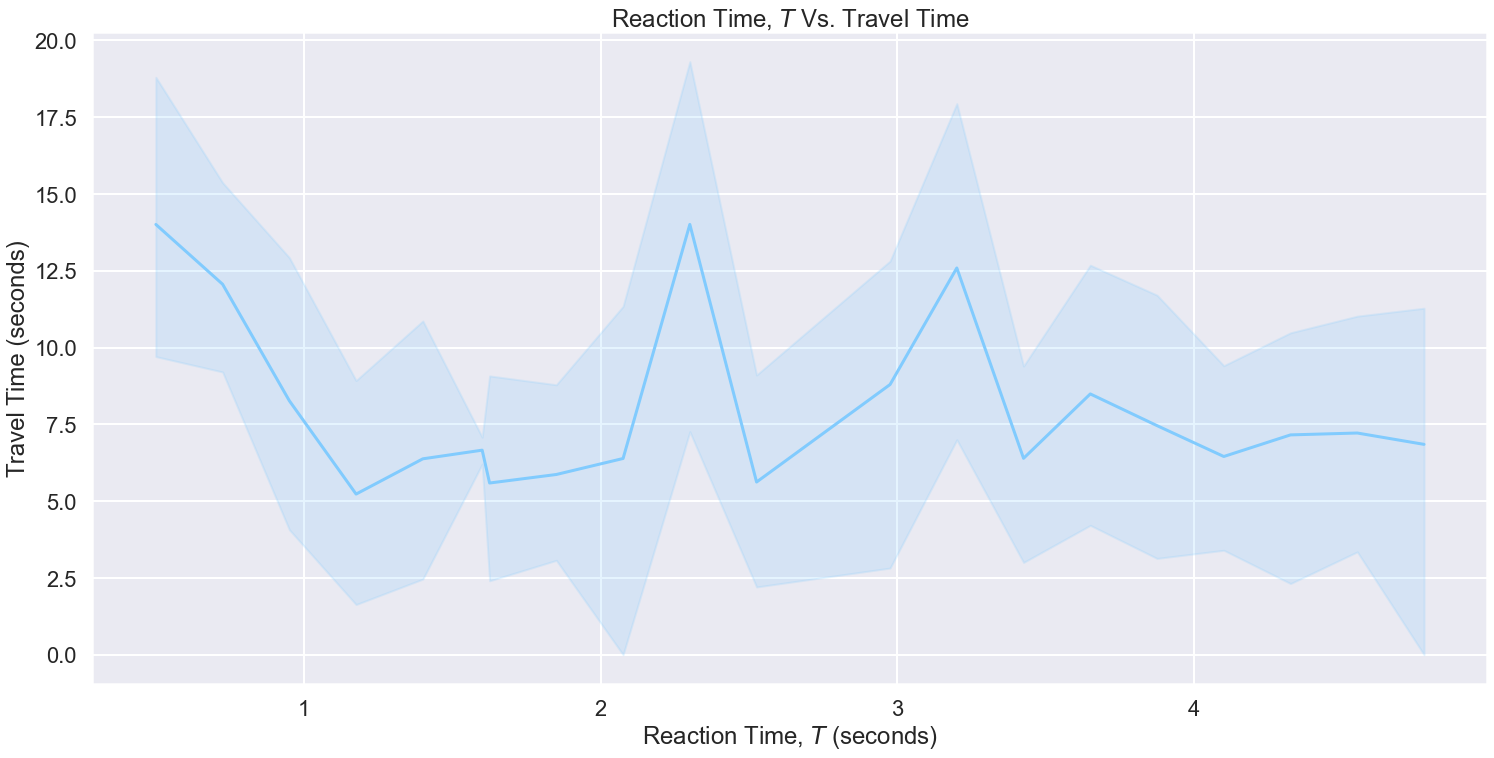

In [252]:
plot_param(param_str='T', title="Reaction Time, $T$ Vs. Travel Time", xlabel="Reaction Time, $T$ (seconds)", color="#81CBFE") 

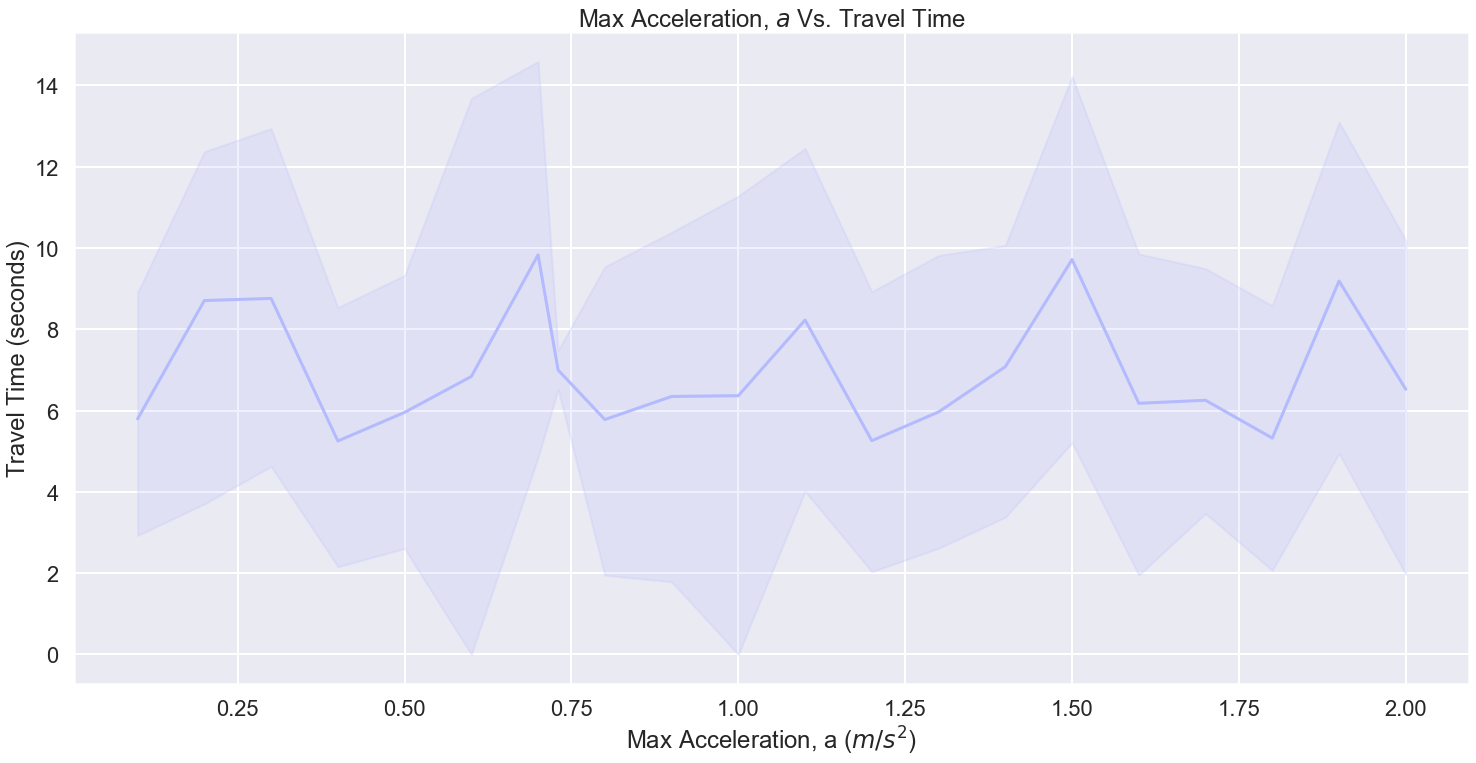

In [254]:
plot_param('a', "Max Acceleration, $a$ Vs. Travel Time", "Max Acceleration, a ($m/s^2$)", "#B3BAFE") 

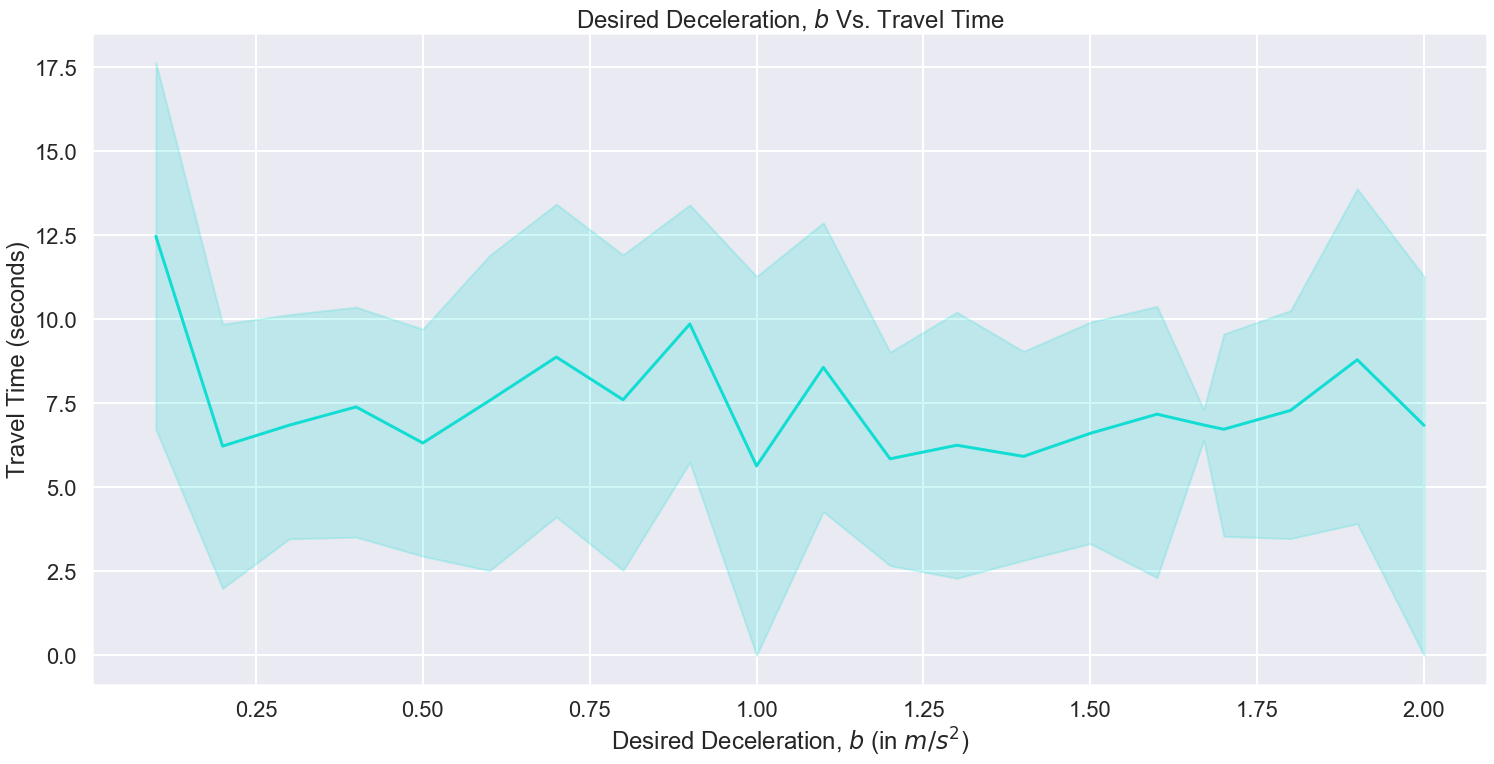

In [255]:
plot_param('b', "Desired Deceleration, $b$ Vs. Travel Time", "Desired Deceleration, $b$ (in $m/s^2$)", "#12DDD3") 

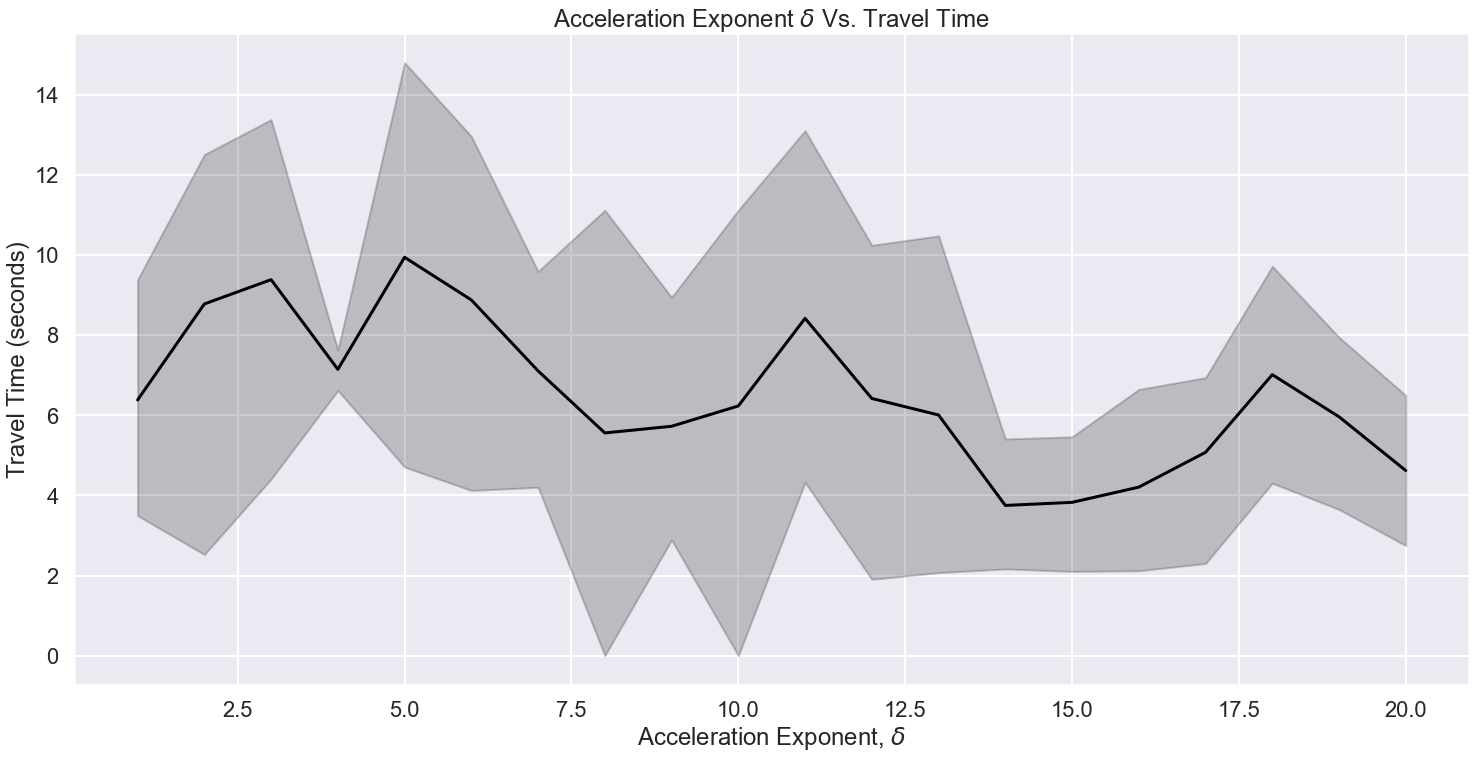

In [256]:
plot_param("delta", "Acceleration Exponent $\delta$ Vs. Travel Time", "Acceleration Exponent, $\delta$", "#000000") 

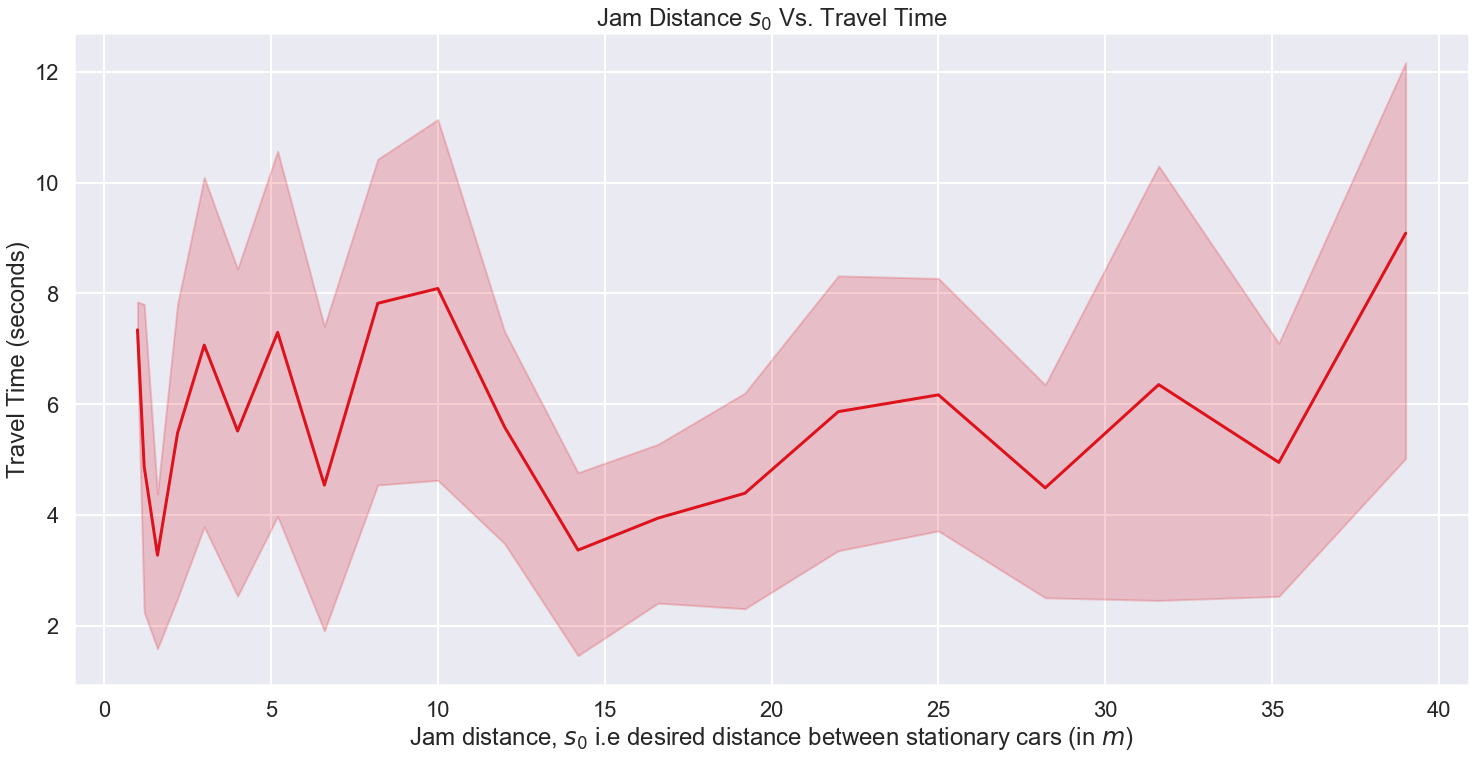

In [257]:
plot_param("s0", "Jam Distance $s_0$ Vs. Travel Time", "Jam distance, $s_0$ i.e desired distance between stationary cars (in $m$)", "#dd121c") 